In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicting Outcomes of Basketball Games

$\texttt{Spencer Ashton}\\$
$\texttt{Trevor Wai}\\$
$\texttt{Carson Watkin}\\$
$\texttt{Zach Joachim}\\$

### December 5, 2023

# **1 Introduction**
Why do we care about this? Allowing players and coaches to focus on drills and metrics that will more likely lead to winning during practice and make adjustments during games.

# **2 Data**

### 2.1 Box scores. 
We got our data by scraping basketballreference.com.  This website contains the box scores from every game sorted by team and season. WHAT IS A BOX SCORE? We had to combine the box scores from every team in a given season into one big dataframe representing each game played in a season. Another thing we considered: do we compare across seasons or just within a given season? We talk about this more LATER.



### 2.2 Data cleaning.
Talking about the cleaning from above. One challenge we ran into was that this approach included each game twice; once from each participating teams' dataset. We employed SOME TACTIC TO DEAL WITH THAT... Below, we show the process of cleaning the data.

In [5]:
team_data = pd.read_csv('./NBA/Utah Jazz/UTA_2018_team_game_log.csv', index_col=1)
team_data.drop('Unnamed: 0', axis=1, inplace=True)
team_data.fillna(value={'H/A': 'vs'}, inplace=True)
team_data.dropna(inplace=True)
team_data.rename(columns={'Tm': 'Team Score', 'Opp.1': 'Opp Score'}, inplace=True)
# team_data.loc[team_data['H/A'] == '@', 'H/A'] = 0
# team_data.loc[team_data['H/A'] == 'vs', 'H/A'] = 1
# team_data.loc[team_data['W/L'] == 'L', 'W/L'] = 0
# team_data.loc[team_data['W/L'] == 'W', 'W/L'] = 1
team_data.head()

,Date,H/A,Opp,W/L,Team Score,Opp Score,FG,FGA,FG%,3P,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
G,,,,,,,,,,,,,,,,,,,,,
1.0,2017-10-18,vs,DEN,W,106.0,96.0,41.0,81.0,0.506,9.0,...,15.0,16.0,0.938,6.0,36.0,28.0,9.0,5.0,15.0,18.0
2.0,2017-10-20,@,MIN,L,97.0,100.0,37.0,77.0,0.481,9.0,...,14.0,17.0,0.824,7.0,38.0,23.0,10.0,8.0,19.0,21.0
3.0,2017-10-21,vs,OKC,W,96.0,87.0,38.0,77.0,0.494,9.0,...,11.0,14.0,0.786,7.0,41.0,22.0,11.0,4.0,18.0,21.0
4.0,2017-10-24,@,LAC,L,84.0,102.0,34.0,79.0,0.430,7.0,...,9.0,11.0,0.818,8.0,41.0,20.0,7.0,7.0,18.0,23.0
5.0,2017-10-25,@,PHO,L,88.0,97.0,32.0,77.0,0.416,6.0,...,18.0,25.0,0.720,7.0,44.0,20.0,8.0,10.0,23.0,19.0


In [4]:
opp_data = pd.read_csv('./NBA/Utah Jazz/UTA_2018_opp_game_log.csv', index_col=1)
opp_data.drop('Unnamed: 0', axis=1, inplace=True)
opp_data.fillna(value={'H/A': 'vs'}, inplace=True)
opp_data.dropna(inplace=True)
opp_data.rename(columns={'Tm': 'Team Score', 'Opp.1': 'Opp Score'}, inplace=True)
opp_data.head()

,Date,H/A,Opp,W/L,Team Score,Opp Score,FG,FGA,FG%,3P,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
G,,,,,,,,,,,,,,,,,,,,,
1.0,2017-10-18,vs,DEN,W,106.0,96.0,36.0,77.0,0.468,13.0,...,11.0,12.0,0.917,7.0,38.0,21.0,4.0,3.0,20.0,18.0
2.0,2017-10-20,@,MIN,L,97.0,100.0,36.0,81.0,0.444,7.0,...,21.0,26.0,0.808,10.0,44.0,17.0,11.0,2.0,15.0,17.0
3.0,2017-10-21,vs,OKC,W,96.0,87.0,32.0,78.0,0.410,11.0,...,12.0,19.0,0.632,8.0,38.0,15.0,14.0,4.0,17.0,16.0
4.0,2017-10-24,@,LAC,L,84.0,102.0,39.0,83.0,0.470,10.0,...,14.0,21.0,0.667,11.0,44.0,21.0,12.0,4.0,13.0,16.0
5.0,2017-10-25,@,PHO,L,88.0,97.0,42.0,96.0,0.438,6.0,...,7.0,9.0,0.778,16.0,55.0,18.0,8.0,5.0,16.0,25.0


### 2.3 Feature engineering
Obviously a good model would just look at total points scored. We had to engineer it.  Blah blah blah. Taking out the points from the box scores. Also talking about four factors from SOURCE.

,Team,Date,eFG%,TOV%,ORB%,FTR,Score,eFG%_cum
2018-04-03_UTA_LAL,UTA,2018-04-03,0.561798,0.121866,0.304348,0.191011,117.0,0.525961
2018-04-05_UTA_LAC,UTA,2018-04-05,0.590361,0.086273,0.263158,0.228916,117.0,0.526779
2018-04-08_UTA_LAL,UTA,2018-04-08,0.584337,0.162631,0.179487,0.180723,112.0,0.527501
2018-04-10_UTA_GSW,UTA,2018-04-10,0.605556,0.135477,0.285714,0.111111,119.0,0.528548
2018-04-11_UTA_POR,UTA,2018-04-11,0.415730,0.123283,0.264151,0.213483,93.0,0.527071


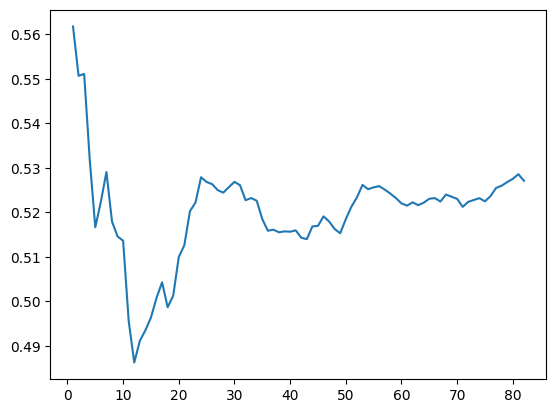

In [13]:
team_four_factors = pd.DataFrame({'Team':[],
                                  'Date':[],
                                  'eFG%':[],
                                  'TOV%':[],
                                  'ORB%':[],
                                  'FTR':[],
                                  'Score':[]})

team_four_factors['Team'] = pd.Series(['UTA' for _ in range(len(team_data['Date']) + 1)])
team_four_factors['Date'] = team_data['Date']
team_four_factors['eFG%'] = (team_data['FG'] + 0.5 * team_data['3P']) / team_data['FGA']
team_data["FG_cum"] = team_data["FG"].cumsum()
team_data["3P_cum"] = team_data["3P"].cumsum()
team_data["FGA_cum"] = team_data["FGA"].cumsum()
team_four_factors["eFG%_cum"] = (team_data['FG_cum'] + 0.5 * team_data['3P_cum']) / team_data['FGA_cum']

team_four_factors['TOV%'] = team_data['TOV'] / (team_data['FGA'] + 0.44 * team_data['FTA'] + team_data['TOV'])
team_four_factors['ORB%'] = team_data['ORB'] / (team_data['ORB'] + (opp_data['TRB'] - opp_data['ORB']))
team_four_factors['FTR'] = team_data['FT'] / team_data['FGA']
team_four_factors['Score'] = team_data['Team Score']
team_four_factors.drop(index=0, inplace=True)
team_four_factors.set_index(team_four_factors['Date'].astype(str) + '_' + team_four_factors['Team'] + '_' + opp_data['Opp'], inplace=True)
team_four_factors.tail()

In [6]:
opp_four_factors = pd.DataFrame({'Team':[],
                                 'Date':[],
                                 'eFG%':[],
                                 'TOV%':[],
                                 'ORB%':[],
                                 'FTR':[],})

opp_four_factors['Team'] = opp_data['Opp']
opp_four_factors['Date'] = opp_data['Date']
opp_four_factors['eFG%'] = (opp_data['FG'] + 0.5 * opp_data['3P']) / opp_data['FGA']
opp_four_factors['TOV%'] = opp_data['TOV'] / (opp_data['FGA'] + 0.44 * opp_data['FTA'] + opp_data['TOV'])
opp_four_factors['ORB%'] = opp_data['ORB'] / (opp_data['ORB'] + (team_data['TRB'] - team_data['ORB']))
opp_four_factors['FTR'] = opp_data['FT'] / opp_data['FGA']
opp_four_factors['Score'] = opp_data['Opp Score']
# opp_four_factors.set_index(opp_four_factors['Date'].astype(str) + '_' + team_four_factors['Team'] + '_' + opp_data['Opp'], inplace=True)
opp_four_factors.head()

,Team,Date,eFG%,TOV%,ORB%,FTR,Score
G,,,,,,,
1.0,DEN,2017-10-18,0.551948,0.195542,0.189189,0.142857,96.0
2.0,MIN,2017-10-20,0.487654,0.139613,0.243902,0.259259,100.0
3.0,OKC,2017-10-21,0.480769,0.164474,0.190476,0.153846,87.0
4.0,LAC,2017-10-24,0.530120,0.123527,0.250000,0.168675,102.0
5.0,PHO,2017-10-25,0.468750,0.137979,0.301887,0.072917,97.0


In [7]:
frames = [team_four_factors, opp_four_factors]
result = pd.concat(frames)

In [8]:
result.dtypes

Team      object
Date      object
eFG%     float64
TOV%     float64
ORB%     float64
FTR      float64
Score    float64
dtype: object